In [292]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [293]:
# Read the data into a dataframe
data = pd.read_csv('takehome.csv', index_col=None, encoding='utf-8')

In [294]:
# Check the first few rows
data.head()

,funnelstatus,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,hr32s,re12s,hr36s,g224b,...,g043c,cv10,br24s,au57s,cv11,rvlr30,walshr08,surrogate_scores,priorloanactiveind,application_date
0,Booked Loan,634,60000.0,159.0,2,3,-1.0,3,-1,2,...,1,6,1,-1,4,4284,0.86,0.000000,-1000,2017-02-07
1,PostBureau Decline,607,39000.0,79.0,3,1,-1.0,2,-1,4,...,-1,7,-1,-1,7,0,-1.00,0.179849,-1000,2017-07-07
2,Approved not listed,729,72000.0,1076.0,0,2,-1.0,7,-1,0,...,0,0,4,-1,0,15780,8.79,0.663154,-1000,2017-09-01
3,Approved not listed,707,130000.0,1869.0,0,1,-1.0,16,-1,0,...,1,2,8,0,1,1629,28.82,0.017764,-1000,2017-11-28
4,Listing not originated,737,35000.0,820.0,0,2,-1.0,3,-1,0,...,0,5,1,0,2,807,88.09,0.002317,-1000,2017-04-01


In [295]:
# Check the dimensions of the data
data.shape

(50000, 207)

In [296]:
# Look at the distributions of numeric attributes
data.describe()

,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,hr32s,re12s,hr36s,g224b,g300s,...,fr30s,g043c,cv10,br24s,au57s,cv11,rvlr30,walshr08,surrogate_scores,priorloanactiveind
count,50000.000000,49734.000000,4.994100e+04,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,683.453180,64893.734668,1.075701e+03,0.31420,2.336460,2011.990160,7.44060,109.346340,0.411120,1.708540,...,7.829760,-0.259060,2.225380,3.91626,0.544260,1.590840,2818.639780,17.909155,0.165514,-937.930180
std,44.942406,64054.805475,6.004760e+03,1.07888,2.083848,17647.987192,5.02273,312.043118,1.193235,2.426526,...,27.063366,0.853746,3.304198,3.03967,34.360689,3.011114,3602.520212,20.170099,0.325349,241.388054
min,600.000000,0.000000,0.000000e+00,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,...,-1.000000,-1.000000,0.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1000.000000
25%,651.000000,35000.000000,4.850000e+02,0.00000,1.000000,-1.000000,4.00000,-1.000000,0.000000,1.000000,...,-1.000000,-1.000000,0.000000,2.00000,-1.000000,0.000000,342.000000,2.250000,0.004609,-1000.000000
50%,678.000000,52000.000000,8.660000e+02,0.00000,2.000000,-1.000000,7.00000,-1.000000,0.000000,1.000000,...,-1.000000,0.000000,1.000000,3.00000,0.000000,0.000000,1655.000000,12.060000,0.017568,-1000.000000
75%,711.000000,78000.000000,1.379000e+03,0.00000,3.000000,-1.000000,10.00000,-1.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,5.00000,0.000000,2.000000,3922.500000,26.240000,0.078888,-1000.000000
max,850.000000,1000000.000000,1.006648e+06,19.00000,21.000000,998399.000000,97.00000,999.000000,22.000000,10.000000,...,100.000000,12.000000,34.000000,37.00000,4774.000000,34.000000,64204.000000,100.000000,1.000000,1.000000


In [297]:
# Check the frequency of funnelstatus
data['funnelstatus'].value_counts()

PostBureau Decline        23369
Approved not listed       19851
Booked Loan                4831
Listing not originated     1949
Name: funnelstatus, dtype: int64

In [298]:
# Distribution of total number of rows for funnelstatus:-
# Booked Loan - 4831/50000 = 9.66%
# Listing not originated - 1949/50000 = 3.90%
# Approved not listed - 19851/50000 = 39.70%
# PostBureau Decline - 23369/50000 = 46.74%

In [299]:
# Check the frequency of priorloanactiveid
data['priorloanactiveind'].value_counts()

-1000    46899
 1        2491
 0         610
Name: priorloanactiveind, dtype: int64

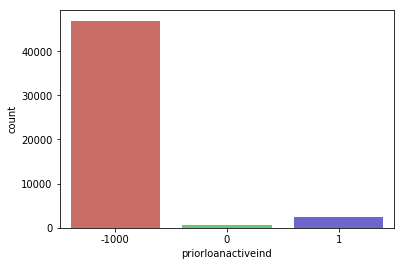

In [300]:
# Check the distribution of priorloanactiveid using a plot in Seaborn
sns.countplot(x='priorloanactiveind', data=data, palette='hls')
plt.show()

In [301]:
# Create a new dataframe where we replace '-1' with missing value (Treatment of negative values)
data1 = data.replace(-1, np.nan)

In [302]:
# Check the first few rows of the new dataframe
data1.head(10)

,funnelstatus,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,hr32s,re12s,hr36s,g224b,...,g043c,cv10,br24s,au57s,cv11,rvlr30,walshr08,surrogate_scores,priorloanactiveind,application_date
0,Booked Loan,634,60000.0,159.0,2.0,3.0,NaN,3.0,NaN,2,...,1.0,6,1.0,NaN,4,4284.0,0.86,0.000000,-1000,2017-02-07
1,PostBureau Decline,607,39000.0,79.0,3.0,1.0,NaN,2.0,NaN,4,...,NaN,7,NaN,NaN,7,0.0,NaN,0.179849,-1000,2017-07-07
2,Approved not listed,729,72000.0,1076.0,0.0,2.0,NaN,7.0,NaN,0,...,0.0,0,4.0,NaN,0,15780.0,8.79,0.663154,-1000,2017-09-01
3,Approved not listed,707,130000.0,1869.0,0.0,1.0,NaN,16.0,NaN,0,...,1.0,2,8.0,0.0,1,1629.0,28.82,0.017764,-1000,2017-11-28
4,Listing not originated,737,35000.0,820.0,0.0,2.0,NaN,3.0,NaN,0,...,0.0,5,1.0,0.0,2,807.0,88.09,0.002317,-1000,2017-04-01
5,Approved not listed,744,56000.0,776.0,0.0,4.0,NaN,9.0,NaN,0,...,0.0,0,5.0,0.0,0,4291.0,16.17,0.030260,-1000,2017-05-25
6,PostBureau Decline,708,25000.0,1178.0,0.0,4.0,NaN,10.0,NaN,0,...,0.0,0,7.0,NaN,0,6431.0,66.35,0.035419,1,2017-04-25
7,Approved not listed,728,100000.0,1734.0,0.0,2.0,NaN,23.0,NaN,0,...,NaN,0,7.0,0.0,0,7098.0,10.99,0.040890,-1000,2017-10-25
8,PostBureau Decline,687,24000.0,1396.0,3.0,1.0,NaN,4.0,999.0,3,...,0.0,7,2.0,0.0,6,0.0,NaN,0.015402,-1000,2017-10-07
9,Approved not listed,679,37000.0,594.0,0.0,4.0,NaN,8.0,NaN,0,...,0.0,3,4.0,0.0,2,1736.0,2.51,0.081358,-1000,2017-08-06


In [303]:
# Look at the summary statistics for numeric attributes
data1.describe()

,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,hr32s,re12s,hr36s,g224b,g300s,...,fr30s,g043c,cv10,br24s,au57s,cv11,rvlr30,walshr08,surrogate_scores,priorloanactiveind
count,50000.000000,49734.000000,4.994100e+04,49924.000000,49577.000000,1568.000000,49215.000000,6616.000000,50000.000000,48469.000000,...,16097.000000,28220.000000,50000.000000,46882.000000,30433.000000,50000.000000,48968.000000,40979.000000,50000.000000,50000.000000
mean,683.453180,64893.734668,1.075701e+03,0.316201,2.364927,64188.737245,7.575231,832.935459,0.411120,1.794095,...,26.426725,0.312792,2.225380,4.243228,1.537147,1.590840,2878.063654,22.071762,0.165514,-937.930180
std,44.942406,64054.805475,6.004760e+03,1.078481,2.069705,77097.151280,4.947292,363.941105,1.193235,2.415567,...,42.012480,0.735322,3.304198,2.853017,44.014431,3.011114,3616.708897,20.008825,0.325349,241.388054
min,600.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1000.000000
25%,651.000000,35000.000000,4.850000e+02,0.000000,1.000000,19814.750000,4.000000,999.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,412.000000,7.290000,0.004609,-1000.000000
50%,678.000000,52000.000000,8.660000e+02,0.000000,2.000000,44214.500000,7.000000,999.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1713.000000,16.240000,0.017568,-1000.000000
75%,711.000000,78000.000000,1.379000e+03,0.000000,3.000000,81784.000000,10.000000,999.000000,0.000000,1.000000,...,50.000000,0.000000,3.000000,6.000000,0.000000,2.000000,3973.000000,30.640000,0.078888,-1000.000000
max,850.000000,1000000.000000,1.006648e+06,19.000000,21.000000,998399.000000,97.000000,999.000000,22.000000,10.000000,...,100.000000,12.000000,34.000000,37.000000,4774.000000,34.000000,64204.000000,100.000000,1.000000,1.000000


In [304]:
# Find variables that have a maximum value of 999 (special values) 
result = ' '
for col in data1.columns:
    if data1[col].max() == 999:
        result = result + ' ' + col

print(result)

  hr36s walshr09 index01 au36s in36s index02 fr36s s061s lm09s pb36s


In [305]:
# Treat special values (999) as missing values
for col in ['hr36s', 'walshr09', 'index01', 'au36s', 'in36s', 'index02', 'fr36s', 's061s', 'lm09s', 'pb36s']:
    if data1[col].max() == 999:
        data1[col].replace(999, np.nan, inplace=True)

In [306]:
# Check new maximum value for hr36s
data1['hr36s'].max()

90.0

In [307]:
# Check new maximum value for walshr09
data1['walshr09'].max()

23.0

In [308]:
# Function to compute the number and percentage of missing values in a dataframe
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [309]:
# Apply the function to data1
missing_values_table(data1)

Your selected dataframe has 207 columns.
There are 185 columns that have missing values.


,Missing Values,% of Total Values
s206s,50000,100.0
s063s,49632,99.3
rp08s,49503,99.0
rp04s,49503,99.0
cv03,49503,99.0
lm17s,49482,99.0
lm29s,49479,99.0
lm14s,49422,98.8
lm20s,49422,98.8
lm24s,49422,98.8


In [310]:
# Look at columns with more than 50% missing values
missing_df = missing_values_table(data1)
missing_df[missing_df['% of Total Values'] > 50].index

Your selected dataframe has 207 columns.
There are 185 columns that have missing values.


Index(['s206s', 's063s', 'rp08s', 'rp04s', 'cv03', 'lm17s', 'lm29s', 'lm14s',
       'lm20s', 'lm24s', 'lm18s', 'lm19s', 'lm16s', 'g230s', 'lm36s', 'lm39s',
       'lm31s', 'fc04s', 'lm09s', 'hi27s', 'hi30s', 'md02s', 'hi57s', 'hr36s',
       'hr27s', 'lm06s', 'lm12s', 'lm04s', 'lm11s', 'hr25s', 'g314s', 'cv09',
       'hr32s', 'hr29s', 'hr12s', 'fr36s', 'hr101s', 'pb36s', 'hi20s', 's063a',
       's209a', 'cv05', 's073b', 's071b', 's064b', 'fi27s', 'g213a', 'g209s',
       'co02s', 'co03s', 'g211s', 'au36s', 'bi27s', 'cv04', 'g215a', 's064a',
       'st27s', 'bi25s', 'pb31s', 'pb28s', 'au27s', 'pb12s', 'in36s', 'st33s',
       'st29s', 'st101s', 'pb101s', 'of03s', 'of12s', 'fr30s', 'mt25s',
       'bi30s', 'of101s', 'st20s', 'st50s', 'st02s', 'walshr09', 'pb21s',
       'mt34s', 'mt31s', 'mt28s', 'mt03s', 'mtap01', 'mt101s', 's061s',
       'g222s', 'of21s', 'au25s', 'fi30s', 'fi35s', 'in27s', 'fr09s'],
      dtype='object')

In [311]:
# Create indicator variables for all variables with more than 50% missing values except s206s which has 100% missing values
data1['s063s_ind'] = (data1['s063s'].notnull()).astype(int)
data1['rp08s_ind'] = (data1['rp08s'].notnull()).astype(int)
data1['rp04s_ind'] = (data1['rp04s'].notnull()).astype(int)
data1['cv03_ind'] = (data1['cv03'].notnull()).astype(int)
data1['lm17s_ind'] = (data1['lm17s'].notnull()).astype(int)
data1['lm29s_ind'] = (data1['lm29s'].notnull()).astype(int)
data1['lm14s_ind'] = (data1['lm14s'].notnull()).astype(int)
data1['lm20s_ind'] = (data1['lm20s'].notnull()).astype(int)
data1['lm24s_ind'] = (data1['lm24s'].notnull()).astype(int)
data1['lm18s_ind'] = (data1['lm18s'].notnull()).astype(int)
data1['lm19s_ind'] = (data1['lm19s'].notnull()).astype(int)
data1['lm16s_ind'] = (data1['lm16s'].notnull()).astype(int)
data1['g230s_ind'] = (data1['g230s'].notnull()).astype(int)
data1['lm36s_ind'] = (data1['lm36s'].notnull()).astype(int)
data1['lm39s_ind'] = (data1['lm39s'].notnull()).astype(int)
data1['lm31s_ind'] = (data1['lm31s'].notnull()).astype(int)
data1['fc04s_ind'] = (data1['fc04s'].notnull()).astype(int)
data1['lm09s_ind'] = (data1['lm09s'].notnull()).astype(int)
data1['hi27s_ind'] = (data1['hi27s'].notnull()).astype(int)
data1['hi30s_ind'] = (data1['hi30s'].notnull()).astype(int)
data1['md02s_ind'] = (data1['md02s'].notnull()).astype(int)
data1['hi57s_ind'] = (data1['hi57s'].notnull()).astype(int)
data1['hr36s_ind'] = (data1['hr36s'].notnull()).astype(int)
data1['hr27s_ind'] = (data1['hr27s'].notnull()).astype(int)
data1['lm06s_ind'] = (data1['lm06s'].notnull()).astype(int)
data1['lm12s_ind'] = (data1['lm12s'].notnull()).astype(int)
data1['lm04s_ind'] = (data1['lm04s'].notnull()).astype(int)
data1['lm11s_ind'] = (data1['lm11s'].notnull()).astype(int)
data1['hr25s_ind'] = (data1['hr25s'].notnull()).astype(int)
data1['g314s_ind'] = (data1['g314s'].notnull()).astype(int)
data1['cv09_ind'] = (data1['cv09'].notnull()).astype(int)
data1['hr32s_ind'] = (data1['hr32s'].notnull()).astype(int)
data1['hr29s_ind'] = (data1['hr29s'].notnull()).astype(int)
data1['hr12s_ind'] = (data1['hr12s'].notnull()).astype(int)
data1['fr36s_ind'] = (data1['fr36s'].notnull()).astype(int)
data1['hr101s_ind'] = (data1['hr101s'].notnull()).astype(int)
data1['pb36s_ind'] = (data1['pb36s'].notnull()).astype(int)
data1['hi20s_ind'] = (data1['hi20s'].notnull()).astype(int)
data1['s063a_ind'] = (data1['s063a'].notnull()).astype(int)
data1['s209a_ind'] = (data1['s209a'].notnull()).astype(int)
data1['cv05_ind'] = (data1['cv05'].notnull()).astype(int)
data1['s073b_ind'] = (data1['s073b'].notnull()).astype(int)
data1['s071b_ind'] = (data1['s071b'].notnull()).astype(int)
data1['s064b_ind'] = (data1['s064b'].notnull()).astype(int)
data1['fi27s_ind'] = (data1['fi27s'].notnull()).astype(int)
data1['g213a_ind'] = (data1['g213a'].notnull()).astype(int)
data1['g209s_ind'] = (data1['g209s'].notnull()).astype(int)
data1['co02s_ind'] = (data1['co02s'].notnull()).astype(int)
data1['co03s_ind'] = (data1['co03s'].notnull()).astype(int)
data1['g211s_ind'] = (data1['g211s'].notnull()).astype(int)
data1['au36s_ind'] = (data1['au36s'].notnull()).astype(int)
data1['bi27s_ind'] = (data1['bi27s'].notnull()).astype(int)
data1['cv04_ind'] = (data1['cv04'].notnull()).astype(int)
data1['g215a_ind'] = (data1['g215a'].notnull()).astype(int)
data1['s064a_ind'] = (data1['s064a'].notnull()).astype(int)
data1['st27s_ind'] = (data1['st27s'].notnull()).astype(int)
data1['bi25s_ind'] = (data1['bi25s'].notnull()).astype(int)
data1['pb31s_ind'] = (data1['pb31s'].notnull()).astype(int)
data1['pb28s_ind'] = (data1['pb28s'].notnull()).astype(int)
data1['au27s_ind'] = (data1['au27s'].notnull()).astype(int)
data1['pb12s_ind'] = (data1['pb12s'].notnull()).astype(int)
data1['in36s_ind'] = (data1['in36s'].notnull()).astype(int)
data1['st33s_ind'] = (data1['st33s'].notnull()).astype(int)
data1['st29s_ind'] = (data1['st29s'].notnull()).astype(int)
data1['st101s_ind'] = (data1['st101s'].notnull()).astype(int)
data1['pb101s_ind'] = (data1['pb101s'].notnull()).astype(int)
data1['of03s_ind'] = (data1['of03s'].notnull()).astype(int)
data1['of12s_ind'] = (data1['of12s'].notnull()).astype(int)
data1['fr30s_ind'] = (data1['fr30s'].notnull()).astype(int)
data1['mt25s_ind'] = (data1['mt25s'].notnull()).astype(int)
data1['bi30s_ind'] = (data1['bi30s'].notnull()).astype(int)
data1['of101s_ind'] = (data1['of101s'].notnull()).astype(int)
data1['st20s_ind'] = (data1['st20s'].notnull()).astype(int)
data1['st50s_ind'] = (data1['st50s'].notnull()).astype(int)
data1['st02s_ind'] = (data1['st02s'].notnull()).astype(int)
data1['walshr09_ind'] = (data1['walshr09'].notnull()).astype(int)
data1['pb21s_ind'] = (data1['pb21s'].notnull()).astype(int)
data1['mt34s_ind'] = (data1['mt34s'].notnull()).astype(int)
data1['mt31s_ind'] = (data1['mt31s'].notnull()).astype(int)
data1['mt28s_ind'] = (data1['mt28s'].notnull()).astype(int)
data1['mt03s_ind'] = (data1['mt03s'].notnull()).astype(int)
data1['mtap01_ind'] = (data1['mtap01'].notnull()).astype(int)
data1['mt101s_ind'] = (data1['mt101s'].notnull()).astype(int)
data1['s061s_ind'] = (data1['s061s'].notnull()).astype(int)
data1['g222s_ind'] = (data1['g222s'].notnull()).astype(int)
data1['of21s_ind'] = (data1['of21s'].notnull()).astype(int)
data1['au25s_ind'] = (data1['au25s'].notnull()).astype(int)
data1['fi30s_ind'] = (data1['fi30s'].notnull()).astype(int)
data1['fi35s_ind'] = (data1['fi35s'].notnull()).astype(int)
data1['in27s_ind'] = (data1['in27s'].notnull()).astype(int)
data1['fr09s_ind'] = (data1['fr09s'].notnull()).astype(int)

In [312]:
# Check the Dataframe
data1.head()

,funnelstatus,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,hr32s,re12s,hr36s,g224b,...,mtap01_ind,mt101s_ind,s061s_ind,g222s_ind,of21s_ind,au25s_ind,fi30s_ind,fi35s_ind,in27s_ind,fr09s_ind
0,Booked Loan,634,60000.0,159.0,2.0,3.0,NaN,3.0,NaN,2,...,1,1,1,1,0,0,0,0,0,1
1,PostBureau Decline,607,39000.0,79.0,3.0,1.0,NaN,2.0,NaN,4,...,0,0,1,1,1,0,0,0,1,0
2,Approved not listed,729,72000.0,1076.0,0.0,2.0,NaN,7.0,NaN,0,...,1,1,0,0,0,0,0,0,0,1
3,Approved not listed,707,130000.0,1869.0,0.0,1.0,NaN,16.0,NaN,0,...,0,0,1,1,0,1,1,1,1,0
4,Listing not originated,737,35000.0,820.0,0.0,2.0,NaN,3.0,NaN,0,...,0,0,1,1,0,1,1,1,1,0


In [313]:
# Drop the columns with more than 50% missing values
missing_df = missing_values_table(data1);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
data1 = data1.drop(columns = list(missing_columns))

Your selected dataframe has 298 columns.
There are 185 columns that have missing values.


In [314]:
# Check the Dataframe
data1.head()

,funnelstatus,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,re12s,g224b,g300s,cv22,...,mtap01_ind,mt101s_ind,s061s_ind,g222s_ind,of21s_ind,au25s_ind,fi30s_ind,fi35s_ind,in27s_ind,fr09s_ind
0,Booked Loan,634,60000.0,159.0,2.0,3.0,3.0,2,9.0,10349.0,...,1,1,1,1,0,0,0,0,0,1
1,PostBureau Decline,607,39000.0,79.0,3.0,1.0,2.0,4,1.0,404.0,...,0,0,1,1,1,0,0,0,1,0
2,Approved not listed,729,72000.0,1076.0,0.0,2.0,7.0,0,1.0,41157.0,...,1,1,0,0,0,0,0,0,0,1
3,Approved not listed,707,130000.0,1869.0,0.0,1.0,16.0,0,1.0,6696.0,...,0,0,1,1,0,1,1,1,1,0
4,Listing not originated,737,35000.0,820.0,0.0,2.0,3.0,0,1.0,2984.0,...,0,0,1,1,0,1,1,1,1,0


In [315]:
# Check the remaining columns with missing values
missing_values_table(data1)

Your selected dataframe has 206 columns.
There are 93 columns that have missing values.


,Missing Values,% of Total Values
g242f,24086,48.2
mt20s,22599,45.2
mt06s,22599,45.2
mt02s,22599,45.2
g043c,21780,43.6
g042c,21780,43.6
bi02s,20063,40.1
au29s,19573,39.1
au34s,19572,39.1
au57s,19567,39.1


In [316]:
# Look at only the column names with missing values
missing_values_table(data1).index

Your selected dataframe has 206 columns.
There are 93 columns that have missing values.


Index(['g242f', 'mt20s', 'mt06s', 'mt02s', 'g043c', 'g042c', 'bi02s', 'au29s',
       'au34s', 'au57s', 'au12s', 'rt27s', 'au101s', 'g242b', 'g244b',
       'paymnt06', 'rtdexq1', 'rtdexq2', 'walshr01', 'walshr02', 'index02',
       'in33s', 'in30s', 'au20s', 'g307s', 'au02s', 'bc27s', 'walshr03',
       'walshr06', 'walshr08', 's114s', 'rt32s', 'rt03s', 'index01', 'g243s',
       'g103s', 'g244s', 'g234s', 'g242s', 'rt21s', 'in09s', 'rvlr12', 'br24s',
       'aggs905', 'br35s', 'br32s', 'br57s', 'br31s', 'rvdexq3', 'rvdexq1',
       'g216s', 'bc32s', 'trv05', 'bc30s', 'bc33s', 'bc97a', 'bc35s', 'bc28s',
       'bc34s', 'bc03s', 'aggs903', 'cv22', 'g219c', 'g300s', 'br06s',
       'rvlr03', 'br20s', 'rvlr30', 'rvlr29', 'rvlr08', 'revs902', 'revs904',
       're31s', 'bc20s', 're12s', 're28s', 'g301s', 'bc09s', 'trv03', 'trv07',
       're06s', 'g303s', 'bwrstatedannualincome', 'g207s', 'at31s', 'at03s',
       'agg901', 'at28a', 'g219b', 'g003s', 'monthlydebt', 'g001b', 'cv25'],
      

In [317]:
# Impute the missing values with the mean
data1.fillna(data1.mean(), inplace=True)

In [318]:
# Review the dataframe
data1.head()

,funnelstatus,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,re12s,g224b,g300s,cv22,...,mtap01_ind,mt101s_ind,s061s_ind,g222s_ind,of21s_ind,au25s_ind,fi30s_ind,fi35s_ind,in27s_ind,fr09s_ind
0,Booked Loan,634,60000.0,159.0,2.0,3.0,3.0,2,9.0,10349.0,...,1,1,1,1,0,0,0,0,0,1
1,PostBureau Decline,607,39000.0,79.0,3.0,1.0,2.0,4,1.0,404.0,...,0,0,1,1,1,0,0,0,1,0
2,Approved not listed,729,72000.0,1076.0,0.0,2.0,7.0,0,1.0,41157.0,...,1,1,0,0,0,0,0,0,0,1
3,Approved not listed,707,130000.0,1869.0,0.0,1.0,16.0,0,1.0,6696.0,...,0,0,1,1,0,1,1,1,1,0
4,Listing not originated,737,35000.0,820.0,0.0,2.0,3.0,0,1.0,2984.0,...,0,0,1,1,0,1,1,1,1,0


In [319]:
# Check for missing values - confirm that there are no missing values
missing_values_table(data1).index

Your selected dataframe has 206 columns.
There are 0 columns that have missing values.


Index([], dtype='object')

In [320]:
# Check column names
list(data1.columns)

['funnelstatus',
 'fico',
 'bwrstatedannualincome',
 'monthlydebt',
 'g219b',
 'trv03',
 're12s',
 'g224b',
 'g300s',
 'cv22',
 're31s',
 'bc30s',
 'g303s',
 'bc97a',
 's114s',
 'aggs905',
 'br32s',
 'in09s',
 'g042s',
 'walshr01',
 'bc34s',
 'au02s',
 'rt01s',
 'at31s',
 'au12s',
 'rvdexq1',
 'au101s',
 'bc27s',
 'mt20s',
 'index01',
 'at20s',
 'g250a',
 'au01s',
 're28s',
 'trv05',
 'pb01s',
 'br57s',
 'at09s',
 'bc28s',
 'br20s',
 'g219c',
 'rtdexq1',
 'rvlr29',
 'g207s',
 'walshr06',
 'walshr03',
 'g242b',
 'g234s',
 'g251a',
 'walshr02',
 'rvdexq3',
 'cv25',
 'bc20s',
 'g066s',
 'g307s',
 'paymnt06',
 'index02',
 'trv07',
 'rt21s',
 'aggs903',
 'rt27s',
 'revs904',
 'g242s',
 'bc09s',
 'agg901',
 'g001b',
 'au29s',
 'bc32s',
 're06s',
 'g250b',
 'g301s',
 'rvlr08',
 'g243s',
 'rvlr03',
 'rt32s',
 'cv13',
 'g103s',
 'at03s',
 'g042c',
 'rtdexq2',
 'cv14',
 'br06s',
 'g244s',
 'fi01s',
 'rvlr12',
 'g216s',
 'revs902',
 'bc33s',
 'rt03s',
 'br35s',
 'mt02s',
 'g244b',
 'au20s',
 'at2

In [321]:
# Feature Engineering

In [322]:
# Create variable for Debt-to-Income ratio
data1['averagemonthlyincome'] = data1['bwrstatedannualincome'] / 12 # Average monthly income
data1['debttoincome'] = data1['monthlydebt'] / data1['averagemonthlyincome']

In [323]:
# Create new variable for prior loan
data1['priorloan'] = data1['priorloanactiveind'].apply(lambda x: 0 if x == -1000 else 1)

In [324]:
# Create new variables such as month and day from the application date
# Create functions to extract month from a date variable
def get_month_from_date(date_var): 

    return {
        'month': date_var.astype(str).str[5:7].astype(int)
    }

In [325]:
# Create functions to extract day from a date variable
def get_day_from_date(date_var): 

    return {
        'day': date_var.astype(str).str[8:10].astype(int)
    }

In [326]:
# Create dictionaries for extracted variables
month_series_dict = get_month_from_date(data1.application_date)
day_series_dict = get_day_from_date(data1.application_date)

In [327]:
# Add new variables to the data1 dataframe
data1['application_month'] = month_series_dict['month']
data1['application_day'] = day_series_dict['day']

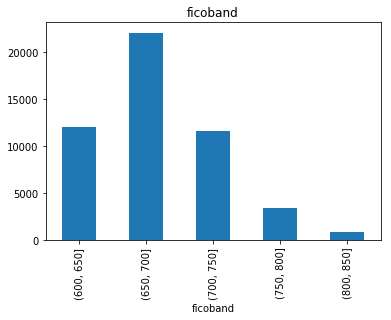

In [328]:
# Create new variable for fico bands
ficobins = [600, 650, 700, 750, 800, 850]
labels = ["600-650", "650-700", "700-750", "750-800", "800-850"]
data1['ficoband'] = pd.cut(data1['fico'], ficobins, labels)

# Plot this new variable
data1['ficoband'].value_counts(sort = False)
pd.crosstab(data1.ficoband, columns = 'Count').plot(kind = 'bar', legend = False, title = 'ficoband')
plt.show()

In [329]:
data1.head()

,funnelstatus,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,re12s,g224b,g300s,cv22,...,fi30s_ind,fi35s_ind,in27s_ind,fr09s_ind,averagemonthlyincome,debttoincome,priorloan,application_month,application_day,ficoband
0,Booked Loan,634,60000.0,159.0,2.0,3.0,3.0,2,9.0,10349.0,...,0,0,0,1,5000.000000,0.031800,0,2,7,"(600, 650]"
1,PostBureau Decline,607,39000.0,79.0,3.0,1.0,2.0,4,1.0,404.0,...,0,0,1,0,3250.000000,0.024308,0,7,7,"(600, 650]"
2,Approved not listed,729,72000.0,1076.0,0.0,2.0,7.0,0,1.0,41157.0,...,0,0,0,1,6000.000000,0.179333,0,9,1,"(700, 750]"
3,Approved not listed,707,130000.0,1869.0,0.0,1.0,16.0,0,1.0,6696.0,...,1,1,1,0,10833.333333,0.172523,0,11,28,"(700, 750]"
4,Listing not originated,737,35000.0,820.0,0.0,2.0,3.0,0,1.0,2984.0,...,1,1,1,0,2916.666667,0.281143,0,4,1,"(700, 750]"


In [330]:
# Create dummy variables for categorical variables
funnelstatus = pd.get_dummies(data1['funnelstatus'], drop_first=False)
ficoband = pd.get_dummies(data1['ficoband'], drop_first=False)

In [331]:
# Drop original variables
data1.drop(['funnelstatus','ficoband'],axis=1,inplace=True)

In [332]:
# Append dummy variables to the train dataframe
data2 = pd.concat([data1,funnelstatus,ficoband],axis=1)

In [333]:
data2.head()

,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,re12s,g224b,g300s,cv22,re31s,...,application_day,Approved not listed,Booked Loan,Listing not originated,PostBureau Decline,"(600, 650]","(650, 700]","(700, 750]","(750, 800]","(800, 850]"
0,634,60000.0,159.0,2.0,3.0,3.0,2,9.0,10349.0,67.0,...,7,0,1,0,0,1,0,0,0,0
1,607,39000.0,79.0,3.0,1.0,2.0,4,1.0,404.0,50.0,...,7,0,0,0,1,1,0,0,0,0
2,729,72000.0,1076.0,0.0,2.0,7.0,0,1.0,41157.0,17.0,...,1,1,0,0,0,0,0,1,0,0
3,707,130000.0,1869.0,0.0,1.0,16.0,0,1.0,6696.0,0.0,...,28,1,0,0,0,0,0,1,0,0
4,737,35000.0,820.0,0.0,2.0,3.0,0,1.0,2984.0,0.0,...,1,0,0,1,0,0,0,1,0,0


In [334]:
# Check the correlation between the target variable (Surrogate Scores) and other independent variables
correlations_data = data2.corr()['surrogate_scores'].sort_values()

In [335]:
# Check the top 15 variables that are negatively correlated with the target variable
print(correlations_data.head(15))

fico                  -0.164452
Approved not listed   -0.147533
(700, 750]            -0.106477
Booked Loan           -0.098543
pb31s_ind             -0.075644
pb28s_ind             -0.075565
g103s                 -0.073692
pb12s_ind             -0.071048
bc97a                 -0.069761
pb101s_ind            -0.068853
mt31s_ind             -0.068364
mt34s_ind             -0.068345
mtap01_ind            -0.068314
mt03s_ind             -0.068314
mt28s_ind             -0.068030
Name: surrogate_scores, dtype: float64


In [336]:
# Check the top 15 variables that are positively correlated with the target variable
print(correlations_data.tail(15))

g066s                 0.096253
g042s                 0.096449
g224b                 0.098145
cv13                  0.099083
cv14                  0.102501
g250a                 0.102928
g251a                 0.104238
g250b                 0.104710
g244s                 0.105601
g242s                 0.111365
g243s                 0.112282
s114s                 0.112612
(600, 650]            0.149926
PostBureau Decline    0.200628
surrogate_scores      1.000000
Name: surrogate_scores, dtype: float64


In [337]:
# Prepare the Data for Building the Model(s)

In [338]:
data.groupby('funnelstatus')['surrogate_scores'].mean()

funnelstatus
Approved not listed       0.106361
Booked Loan               0.067481
Listing not originated    0.175515
PostBureau Decline        0.235195
Name: surrogate_scores, dtype: float64

In [339]:
data[data['funnelstatus'] != 'Booked Loan']['surrogate_scores'].mean()

0.1759991474169939

In [340]:
data[data['funnelstatus'] == 'Booked Loan']['surrogate_scores'].mean()

0.06748085282550197

In [341]:
start_date = '2017-11-01'
end_date = '2017-12-31'

mask = (data2['application_date'] > start_date) & (data2['application_date'] <= end_date)

test = data2.loc[mask] # test data for out-of-time validation
test

,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,re12s,g224b,g300s,cv22,re31s,...,application_day,Approved not listed,Booked Loan,Listing not originated,PostBureau Decline,"(600, 650]","(650, 700]","(700, 750]","(750, 800]","(800, 850]"
3,707,130000.000000,1869.0,0.0,1.000000,16.000000,0,1.000000,6696.000000,0.000000,...,28,1,0,0,0,0,0,1,0,0
11,711,65000.000000,1593.0,0.0,2.000000,11.000000,0,1.000000,19387.000000,33.000000,...,8,1,0,0,0,0,0,1,0,0
12,624,65000.000000,908.0,0.0,2.000000,4.000000,0,1.000000,6162.000000,25.000000,...,16,0,0,0,1,1,0,0,0,0
22,655,32000.000000,58.0,0.0,0.000000,2.000000,0,1.000000,222.000000,0.000000,...,12,0,0,0,1,0,1,0,0,0
24,682,54000.000000,992.0,0.0,2.000000,7.000000,0,1.000000,24370.000000,38.000000,...,10,1,0,0,0,0,1,0,0,0
28,630,45000.000000,389.0,0.0,0.000000,2.000000,0,1.000000,252.000000,100.000000,...,11,0,0,0,1,1,0,0,0,0
38,678,58000.000000,1706.0,0.0,1.000000,6.000000,0,1.000000,15044.000000,33.000000,...,23,1,0,0,0,0,1,0,0,0
39,693,65000.000000,1569.0,0.0,0.000000,10.000000,0,1.000000,28389.000000,33.000000,...,13,0,0,1,0,0,1,0,0,0
44,707,90000.000000,2315.0,0.0,5.000000,10.000000,0,1.000000,2466.000000,0.000000,...,15,0,0,0,1,0,0,1,0,0
48,697,42000.000000,1249.0,0.0,6.000000,12.000000,0,1.000000,9495.000000,25.000000,...,24,1,0,0,0,0,1,0,0,0


In [342]:
start_date = '2017-01-01'
end_date = '2017-10-31'

mask = (data2['application_date'] > start_date) & (data2['application_date'] <= end_date)

train = data2.loc[mask]
train

,fico,bwrstatedannualincome,monthlydebt,g219b,trv03,re12s,g224b,g300s,cv22,re31s,...,application_day,Approved not listed,Booked Loan,Listing not originated,PostBureau Decline,"(600, 650]","(650, 700]","(700, 750]","(750, 800]","(800, 850]"
0,634,60000.0,159.0,2.0,3.0,3.0,2,9.0,10349.0,67.0,...,7,0,1,0,0,1,0,0,0,0
1,607,39000.0,79.0,3.0,1.0,2.0,4,1.0,404.0,50.0,...,7,0,0,0,1,1,0,0,0,0
2,729,72000.0,1076.0,0.0,2.0,7.0,0,1.0,41157.0,17.0,...,1,1,0,0,0,0,0,1,0,0
4,737,35000.0,820.0,0.0,2.0,3.0,0,1.0,2984.0,0.0,...,1,0,0,1,0,0,0,1,0,0
5,744,56000.0,776.0,0.0,4.0,9.0,0,1.0,12862.0,11.0,...,25,1,0,0,0,0,0,1,0,0
6,708,25000.0,1178.0,0.0,4.0,10.0,0,1.0,13369.0,20.0,...,25,0,0,0,1,0,0,1,0,0
7,728,100000.0,1734.0,0.0,2.0,23.0,0,1.0,40081.0,9.0,...,25,1,0,0,0,0,0,1,0,0
8,687,24000.0,1396.0,3.0,1.0,4.0,3,10.0,471.0,67.0,...,7,0,0,0,1,0,1,0,0,0
9,679,37000.0,594.0,0.0,4.0,8.0,0,1.0,7801.0,22.0,...,6,1,0,0,0,0,1,0,0,0
10,716,125000.0,2624.0,0.0,3.0,7.0,0,2.0,84451.0,75.0,...,29,0,0,1,0,0,0,1,0,0


In [343]:
train_dev, train_val = train_test_split(train, train_size = 0.7)

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [344]:
train_dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29254 entries, 24036 to 25838
Columns: 219 entries, fico to (800, 850]
dtypes: float64(96), int32(93), int64(20), object(1), uint8(9)
memory usage: 37.0+ MB


In [345]:
train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12538 entries, 17155 to 30532
Columns: 219 entries, fico to (800, 850]
dtypes: float64(96), int32(93), int64(20), object(1), uint8(9)
memory usage: 15.8+ MB


In [346]:
train_dev[train_dev['Booked Loan'] == 1]['surrogate_scores'].mean()

0.06263194933145672

In [347]:
train_dev[train_dev['Booked Loan'] != 1]['surrogate_scores'].mean()

0.17444073209047536

In [348]:
# Create new target variable which has values of (0, 1) in the development data
train_dev['new_surrogate_scores'] = train_dev['surrogate_scores'].apply(lambda x: 0 if x <= 0.25 else 1)

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [349]:
train_dev[train_dev['Booked Loan'] == 1]['new_surrogate_scores'].mean()

0.06263194933145672

In [350]:
train_dev[train_dev['Booked Loan'] != 1]['new_surrogate_scores'].mean()

0.1743525670149932

In [351]:
# Create new target variable which has values of (0, 1) in the development data
train_val['new_surrogate_scores'] = train_val['surrogate_scores'].apply(lambda x: 0 if x <= 0.25 else 1)

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [352]:
# Feature Selection

In [353]:
# Data Preparation to perform Feature Selection via Recursive Feature Elimination (RFE)
le = LabelEncoder()
y = train_dev['new_surrogate_scores'].values
y = le.fit(y).transform(y)

In [354]:
# Data Preparation - 2
X = train_dev[[col for col in train_dev.columns if col not in ['new_surrogate_scores','surrogate_scores','application_date','funnelstatus']]]
train_dev_2 = pd.DataFrame(X)
train_dev_2['new_surrogate_scores'] = y
train_dev_clean = train_dev_2.dropna(how = 'any')
X = train_dev_clean[[col for col in train_dev.columns if col not in ['new_surrogate_scores','surrogate_scores','application_date','funnelstatus']]]
y = train_dev_clean['new_surrogate_scores']

X = X.replace({np.inf: 0, -np.inf: np.nan})

In [157]:
# Running RFE
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)

In [355]:
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [356]:
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

20
[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
  True False False False False False False False False False False False
 False False False  True False False  True False False False False False
 False False False False False False False False

In [357]:
# check selected features
features_bool = np.array(fit.support_)
features = np.array(X.columns)
result = features[features_bool]
print(result)

['au12s' 'g234s' 'au29s' 'g230s_ind' 'md02s_ind' 'hr101s_ind' 's063a_ind'
 'of03s_ind' 'of12s_ind' 'st20s_ind' 'walshr09_ind' 'mt28s_ind'
 'au25s_ind' 'fi30s_ind' 'in27s_ind' 'Approved not listed' 'Booked Loan'
 'PostBureau Decline' Interval(650, 700, closed='right')
 Interval(700, 750, closed='right')]


In [358]:
#print(list(zip(map(lambda x: round(x, 4), fit.ranking_), list(X.columns))))

In [359]:
# Build a model using the features obtained from RFE
le = LabelEncoder()
y = train_dev['new_surrogate_scores'].values
y = le.fit(y).transform(y)

In [360]:
X = train_dev[[col for col in train_dev.columns if col in ['au12s','g234s','au29s','g230s_ind','md02s_ind','hr101s_ind','s063a_ind','of03s_ind', 
                                                           'of12s_ind','st20s_ind','walshr09_ind','mt28s_ind','au25s_ind','fi30s_ind','in27s_ind']]]
train_dev_2 = pd.DataFrame(X)
train_dev_2['new_surrogate_scores'] = y
train_dev_clean = train_dev_2.dropna(how = 'any')
X_train = train_dev_clean[[col for col in train_dev.columns if col in ['au12s','g234s','au29s','g230s_ind','md02s_ind','hr101s_ind','s063a_ind','of03s_ind', 
                                                           'of12s_ind','st20s_ind','walshr09_ind','mt28s_ind','au25s_ind','fi30s_ind','in27s_ind']]]
y_train = train_dev_clean['new_surrogate_scores']

In [361]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29254 entries, 24036 to 25838
Data columns (total 15 columns):
au12s           29254 non-null float64
g234s           29254 non-null float64
au29s           29254 non-null float64
g230s_ind       29254 non-null int32
md02s_ind       29254 non-null int32
hr101s_ind      29254 non-null int32
s063a_ind       29254 non-null int32
of03s_ind       29254 non-null int32
of12s_ind       29254 non-null int32
st20s_ind       29254 non-null int32
walshr09_ind    29254 non-null int32
mt28s_ind       29254 non-null int32
au25s_ind       29254 non-null int32
fi30s_ind       29254 non-null int32
in27s_ind       29254 non-null int32
dtypes: float64(3), int32(12)
memory usage: 2.2 MB


In [362]:
le = LabelEncoder()
y = train_val['new_surrogate_scores'].values
y = le.fit(y).transform(y)

In [363]:
X = train_val[[col for col in train_val.columns if col in ['au12s','g234s','au29s','g230s_ind','md02s_ind','hr101s_ind','s063a_ind','of03s_ind', 
                                                           'of12s_ind','st20s_ind','walshr09_ind','mt28s_ind','au25s_ind','fi30s_ind','in27s_ind']]]
train_val_2 = pd.DataFrame(X)
train_val_2['new_surrogate_scores'] = y
train_val_clean = train_val_2.dropna(how = 'any')
X_test = train_val_clean[[col for col in train_val.columns if col in ['au12s','g234s','au29s','g230s_ind','md02s_ind','hr101s_ind','s063a_ind','of03s_ind', 
                                                           'of12s_ind','st20s_ind','walshr09_ind','mt28s_ind','au25s_ind','fi30s_ind','in27s_ind']]]
y_test = train_val_clean['new_surrogate_scores']

In [364]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12538 entries, 17155 to 30532
Data columns (total 15 columns):
au12s           12538 non-null float64
g234s           12538 non-null float64
au29s           12538 non-null float64
g230s_ind       12538 non-null int32
md02s_ind       12538 non-null int32
hr101s_ind      12538 non-null int32
s063a_ind       12538 non-null int32
of03s_ind       12538 non-null int32
of12s_ind       12538 non-null int32
st20s_ind       12538 non-null int32
walshr09_ind    12538 non-null int32
mt28s_ind       12538 non-null int32
au25s_ind       12538 non-null int32
fi30s_ind       12538 non-null int32
in27s_ind       12538 non-null int32
dtypes: float64(3), int32(12)
memory usage: 979.5 KB


In [365]:
# OOT Data
# Create new target variable which has values of (0, 1) in the development data
test['new_surrogate_scores'] = test['surrogate_scores'].apply(lambda x: 0 if x <= 0.25 else 1)

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [366]:
le = LabelEncoder()
y = test['new_surrogate_scores'].values
y = le.fit(y).transform(y)

In [367]:
X = test[[col for col in test.columns if col in ['au12s','g234s','au29s','g230s_ind','md02s_ind','hr101s_ind','s063a_ind','of03s_ind', 
                                                           'of12s_ind','st20s_ind','walshr09_ind','mt28s_ind','au25s_ind','fi30s_ind','in27s_ind']]]
test_2 = pd.DataFrame(X)
test_2['new_surrogate_scores'] = y
test_clean = test_2.dropna(how = 'any')
X_test_oot = test_clean[[col for col in test.columns if col in ['au12s','g234s','au29s','g230s_ind','md02s_ind','hr101s_ind','s063a_ind','of03s_ind', 
                                                           'of12s_ind','st20s_ind','walshr09_ind','mt28s_ind','au25s_ind','fi30s_ind','in27s_ind']]]
y_test_oot = test_clean['new_surrogate_scores']

In [368]:
X_test_oot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8023 entries, 3 to 49992
Data columns (total 15 columns):
au12s           8023 non-null float64
g234s           8023 non-null float64
au29s           8023 non-null float64
g230s_ind       8023 non-null int32
md02s_ind       8023 non-null int32
hr101s_ind      8023 non-null int32
s063a_ind       8023 non-null int32
of03s_ind       8023 non-null int32
of12s_ind       8023 non-null int32
st20s_ind       8023 non-null int32
walshr09_ind    8023 non-null int32
mt28s_ind       8023 non-null int32
au25s_ind       8023 non-null int32
fi30s_ind       8023 non-null int32
in27s_ind       8023 non-null int32
dtypes: float64(3), int32(12)
memory usage: 626.8 KB


In [369]:
# Build a Gradient Boosting Model
GB = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=100, n_estimators=200, max_features=5, max_depth=5, random_state=42)

# Fit and score the model on the train data
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.8382785260135366

In [370]:
# Score the model on the test data
GB.score(X_test, y_test)

0.8309937789121072

In [371]:
GB.score(X_test_oot, y_test_oot)

0.8307366321824754

In [372]:
# Generate the predictions on the test data
y_pred = GB.predict(X_test)

# Review metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10403    20]
 [ 2099    16]]
             precision    recall  f1-score   support

          0       0.83      1.00      0.91     10423
          1       0.44      0.01      0.01      2115

avg / total       0.77      0.83      0.76     12538



In [373]:
# Generate the predictions on the oot test data
y_pred = GB.predict(X_test_oot)

# Review metrics
print(confusion_matrix(y_test_oot, y_pred))
print(classification_report(y_test_oot, y_pred))

[[6659   17]
 [1341    6]]
             precision    recall  f1-score   support

          0       0.83      1.00      0.91      6676
          1       0.26      0.00      0.01      1347

avg / total       0.74      0.83      0.76      8023

